# Image Classification with CNN for CIFAR_10 Data

In [28]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,InputLayer,Reshape,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 88s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

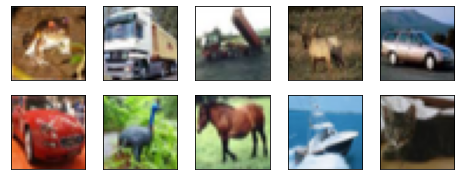

In [16]:
fig=plt.figure(figsize = (8 ,3))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1)
    ax.imshow(x_train[i])
    ax.set_xticks([]) , ax.set_yticks([])
plt.show()

In [46]:
x_train=x_train/255.0
x_test=x_test/255.0

### Image Classification

In [47]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2, 64)          65600     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 1, 1, 64)        

In [48]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [49]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5777 - accuracy: 0.4164 - val_loss: 1.3984 - val_accuracy: 0.4983
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2090 - accuracy: 0.5692 - val_loss: 1.2122 - val_accuracy: 0.5714
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0619 - accuracy: 0.6217 - val_loss: 1.0999 - val_accuracy: 0.6098
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9754 - accuracy: 0.6575 - val_loss: 1.0207 - val_accuracy: 0.6425
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9016 - accuracy: 0.6842 - val_loss: 1.0429 - val_accuracy: 0.6520
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8520 - accuracy: 0.7017 - val_loss: 0.9992 - val_accuracy: 0.6516
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8046 - accuracy: 0.7193 - val_loss: 0.9774 -

In [50]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.577718,0.41640,1.398416,0.4983
1,1.209008,0.56920,1.212236,0.5714
2,1.061936,0.62166,1.099884,0.6098
3,0.975377,0.65750,1.020726,0.6425
4,0.901645,0.68420,1.042877,0.6520
5,0.852027,0.70170,0.999204,0.6516
6,0.804608,0.71926,0.977444,0.6704
7,0.771239,0.73254,0.938078,0.6795
8,0.730950,0.74492,0.998627,0.6729
9,0.700174,0.75356,0.938791,0.6807


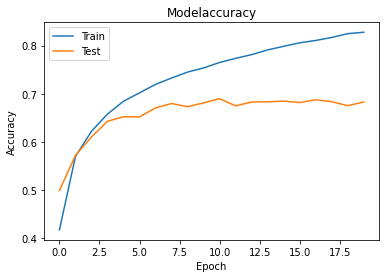

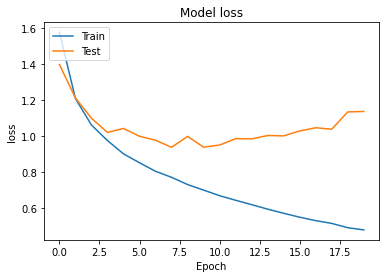

In [51]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()